In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from PythonTsa.plot_acf_pacf import acf_pacf_fig

In [2]:
# Loading the Bitcoin dataset
bitcoin = pd.read_csv('../ATSSB_BTC/bitcoin_price_data.csv', header=0)

# Setting the date index
dat = pd.date_range(start='2017-06-01', periods=len(bitcoin), freq='D')
bitcoin.index = dat

# Extracting the closing price
price = bitcoin['ClosingP']

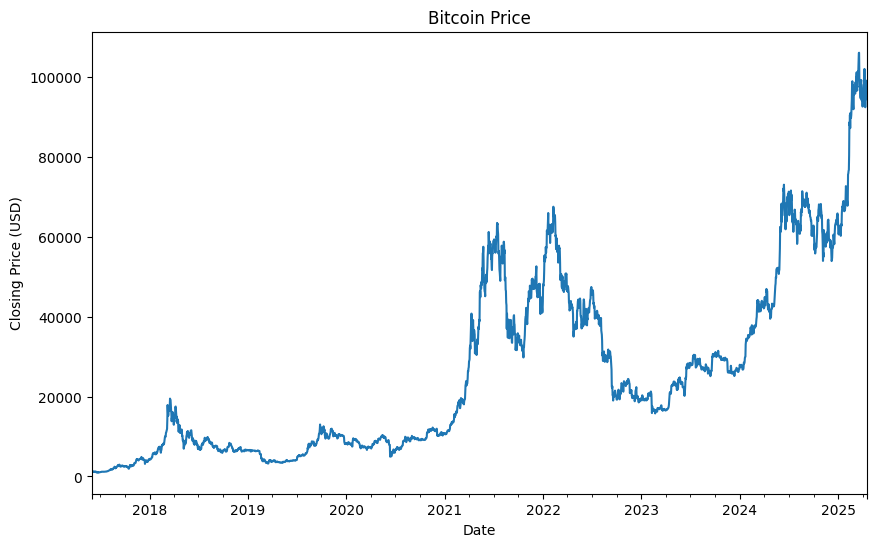

In [3]:
# Plotting the time series data
price.plot(figsize=(10, 6))
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.savefig("bitcoin_price", transparent=True, dpi=600)
plt.show()

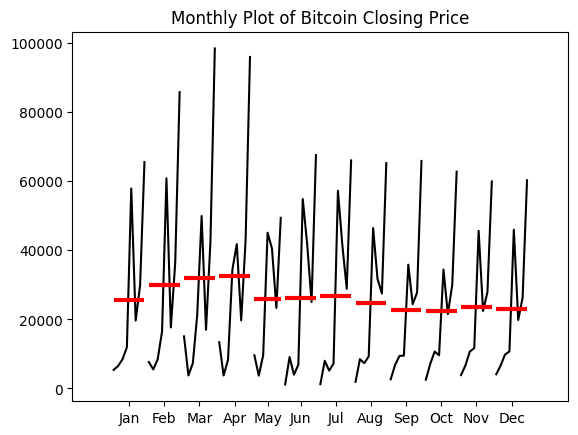

In [4]:
# Month plot for seasonality check
monthly_price = price.groupby(price.index.strftime('%Y-%m')).mean().to_frame()
monthly_price.index = pd.to_datetime(monthly_price.index)
month_plot(monthly_price)
plt.title('Monthly Plot of Bitcoin Closing Price')
plt.savefig("bitcoin_price_seasonal", transparent=True, dpi=600)
plt.show()

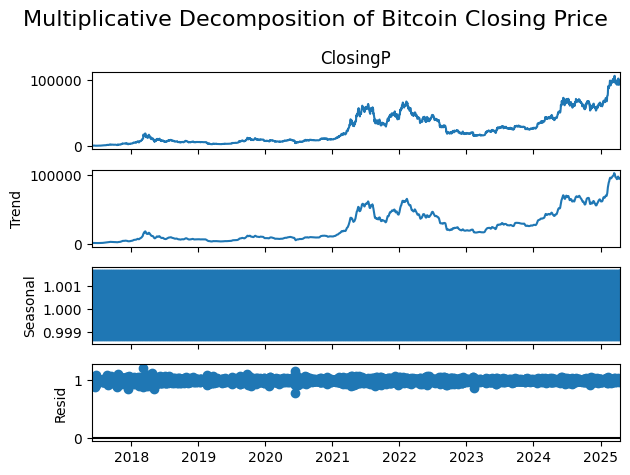

In [37]:
# Seasonal decomposition (Multiplicative and Additive)
decomp_mul = seasonal_decompose(price, model='multiplicative')
decomp_mul.plot()
plt.suptitle('Multiplicative Decomposition of Bitcoin Closing Price', fontsize=16)
plt.tight_layout()
plt.savefig("bitcoin_price_multiplicative", transparent=True, dpi=600)
plt.show()

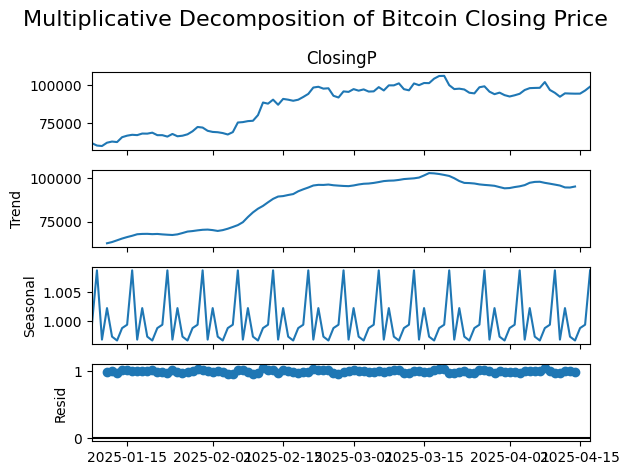

In [38]:
decomp_mul_100 = seasonal_decompose(price[-100:], model='multiplicative')
decomp_mul_100.plot()
plt.suptitle('Multiplicative Decomposition of Bitcoin Closing Price', fontsize=16)
plt.tight_layout()
plt.savefig("bitcoin_price_multiplicative_100_days", transparent=True, dpi=600)
plt.show()

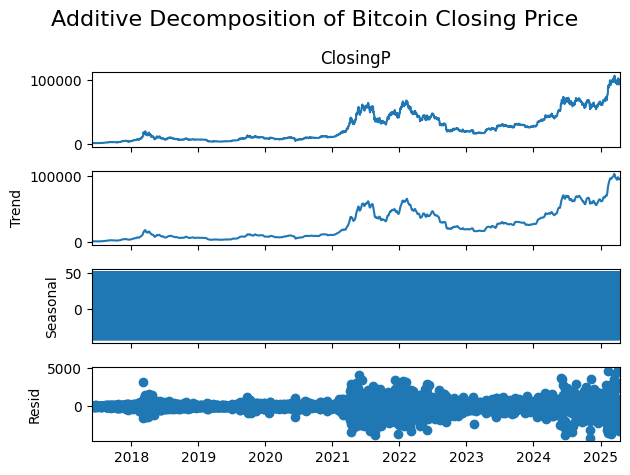

In [39]:
decomp_add = seasonal_decompose(price, model='additive')
decomp_add.plot()
plt.suptitle('Additive Decomposition of Bitcoin Closing Price', fontsize=16)
plt.tight_layout()
plt.show()

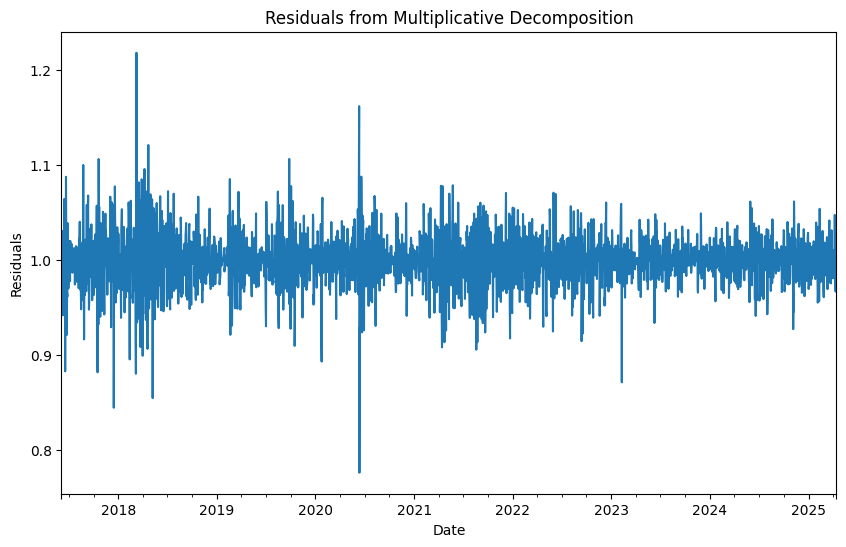

In [40]:
# Residuals from multiplicative decomposition
residuals_mul = decomp_mul.resid.dropna()
residuals_mul.plot(figsize=(10, 6))
plt.title('Residuals from Multiplicative Decomposition')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.savefig("bitcoin_price_multiplicative_residuals", transparent=True, dpi=600)
plt.show()

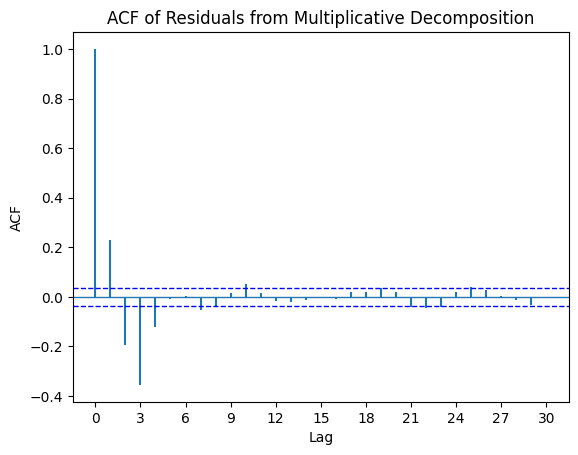

In [41]:
# ACF and PACF of Residuals
acf_pacf_fig(residuals_mul)
plt.title('ACF of Residuals from Multiplicative Decomposition')
plt.savefig("bitcoin_price_multiplicative_residuals_acf", transparent=True, dpi=600)
plt.show()

/opt/anaconda3/envs/atssb/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


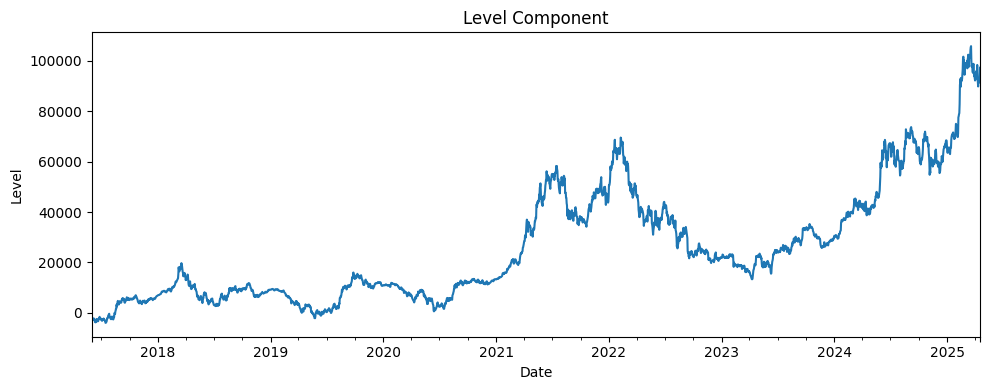

In [45]:
# Holt-Winters Exponential Smoothing
hw_fit = ExponentialSmoothing(price, trend='add', seasonal='add', seasonal_periods=365).fit()

plt.figure(figsize=(10, 4))
hw_fit.level.plot()
plt.ylabel('Level')
plt.title('Level Component')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig("bitcoin_price_holtwinters_level", transparent=True, dpi=600)
plt.show()

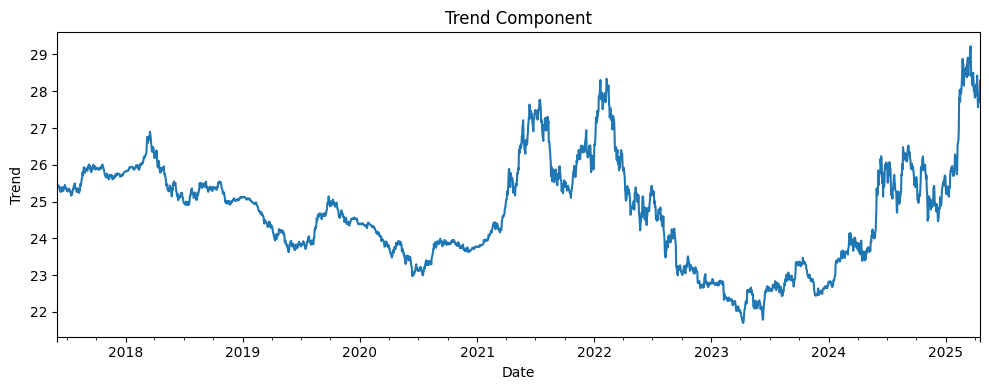

In [46]:
plt.figure(figsize=(10, 4))
hw_fit.trend.plot()
plt.ylabel('Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig("bitcoin_price_holtwinters_trend", transparent=True, dpi=600)
plt.show()

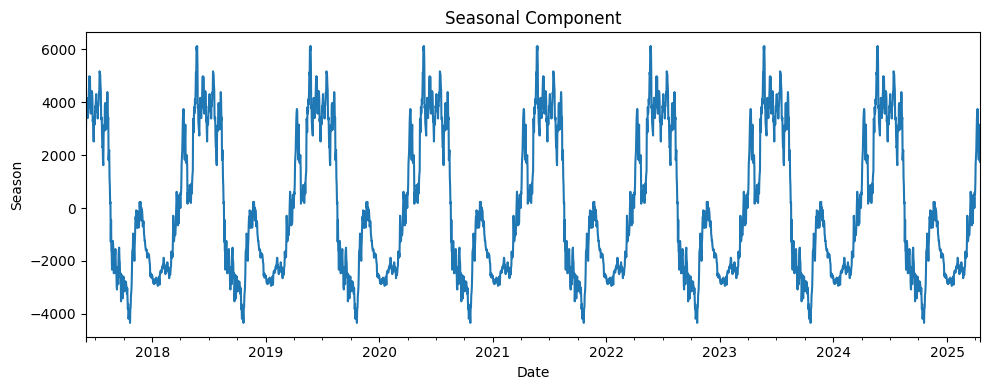

In [47]:
plt.figure(figsize=(10, 4))
hw_fit.season.plot()
plt.ylabel('Season')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig("bitcoin_price_holtwinters_seasonal", transparent=True, dpi=600)
plt.show()

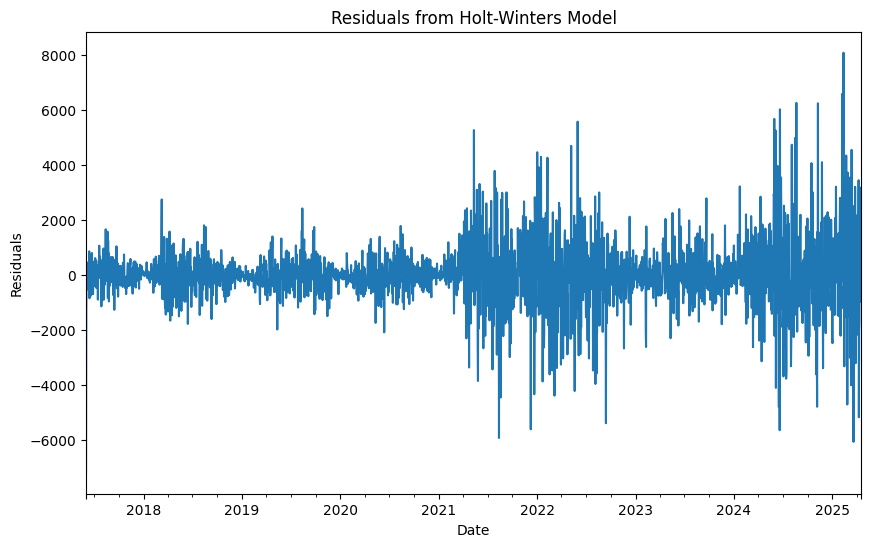

In [48]:
# Plotting Residuals from Holt-Winters model
hw_fit.resid.plot(figsize=(10, 6))
plt.title('Residuals from Holt-Winters Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.savefig("bitcoin_price_holtwinters_residuals", transparent=True, dpi=600)
plt.show()

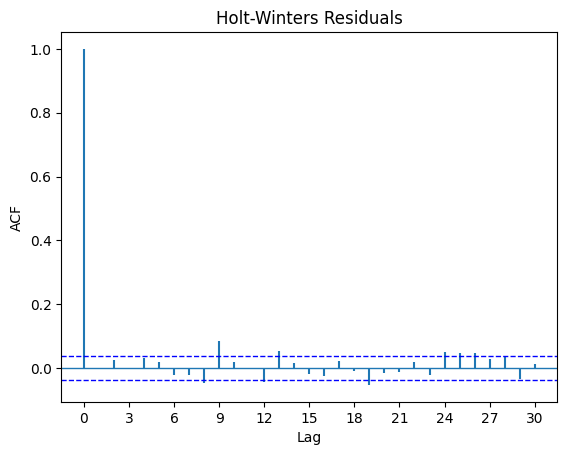

In [49]:
acf_pacf_fig(hw_fit.resid.dropna())
plt.title('Holt-Winters Residuals')
plt.savefig("bitcoin_price_holtwinters_residuals_acf", transparent=True, dpi=600)
plt.show()